In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
plt.style.use("seaborn-v0_8-darkgrid")
warnings.filterwarnings("ignore")
import joblib
import os
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Additions
Top n features

In [ ]:
df=pd.read_csv("evi.csv")

# 1.Data Inspection

In [ ]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
df.shape

(18524, 9)

In [ ]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
df.select_dtypes(include='object').nunique()

,0
Stage_fear,2
Drained_after_socializing,2
Personality,2


In [ ]:
df['Personality'].value_counts()

,count
Personality,
Extrovert,13699
Introvert,4825


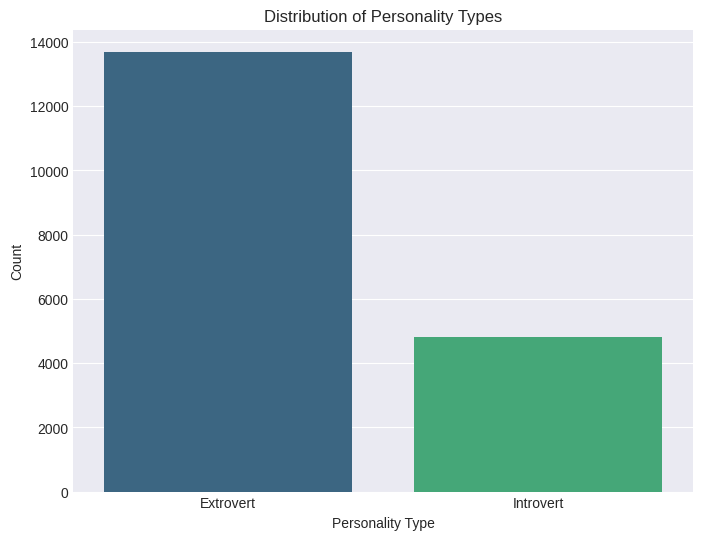

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Personality', palette='viridis')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


# 2.Data Cleaning

In [ ]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("Missing values after imputation:")
print(df[numerical_cols].isnull().sum())

Missing values after imputation:
Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64


In [ ]:
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("Missing values after categorical imputation:")
print(df[categorical_cols].isnull().sum())

Missing values after categorical imputation:
Stage_fear                   0
Drained_after_socializing    0
dtype: int64


In [ ]:
print("Missing values after complete imputation:")
print(df.isnull().sum())

Missing values after complete imputation:
id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


# 3.Exploratory Data Analysis

## 3.1 Distribution of TIme Spent Alone

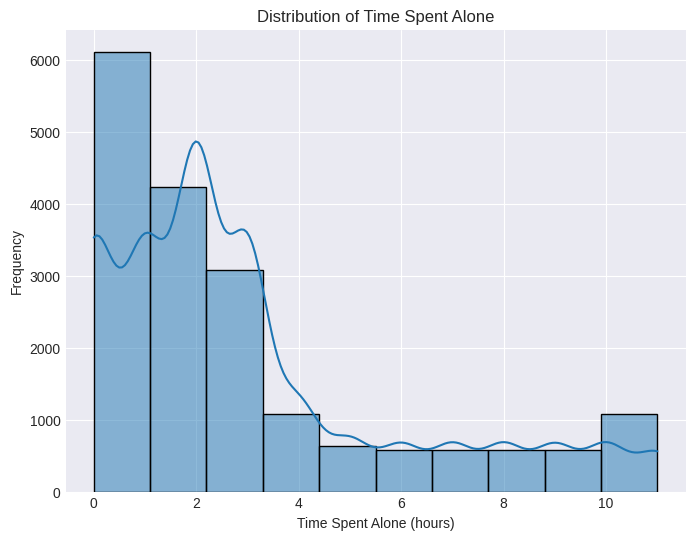

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Time_spent_Alone', kde=True, bins=10)
plt.title('Distribution of Time Spent Alone')
plt.xlabel('Time Spent Alone (hours)')
plt.ylabel('Frequency')
plt.show()

## 3.2 Distribution of Social Event Attendance

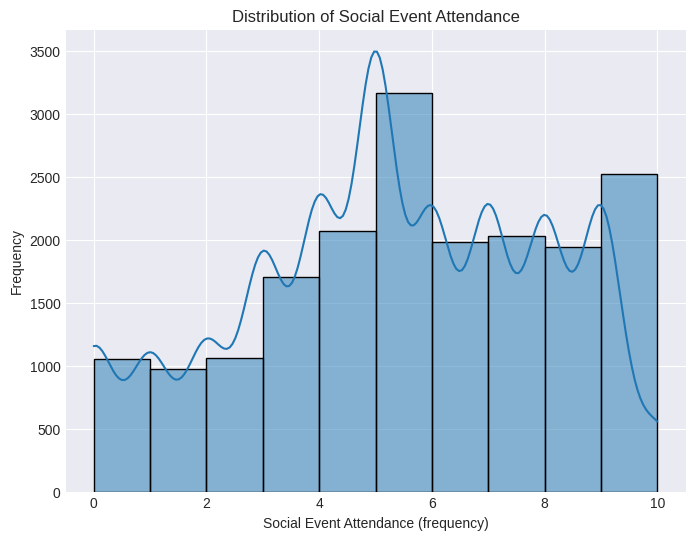

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Social_event_attendance', kde=True, bins=10)
plt.title('Distribution of Social Event Attendance')
plt.xlabel('Social Event Attendance (frequency)')
plt.ylabel('Frequency')
plt.show()

## 3.3 Distribution OF Going Outside Frequency

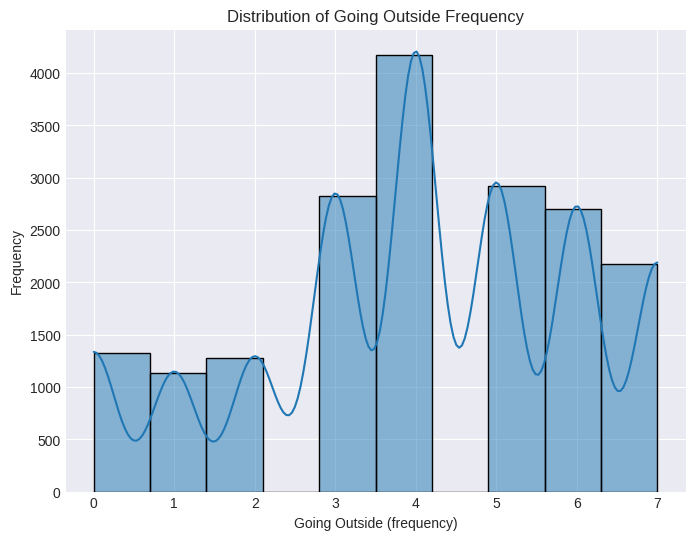

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Going_outside', kde=True, bins=10)
plt.title('Distribution of Going Outside Frequency')
plt.xlabel('Going Outside (frequency)')
plt.ylabel('Frequency')
plt.show()

## 3.4 Distribution Of Friends Circle Size

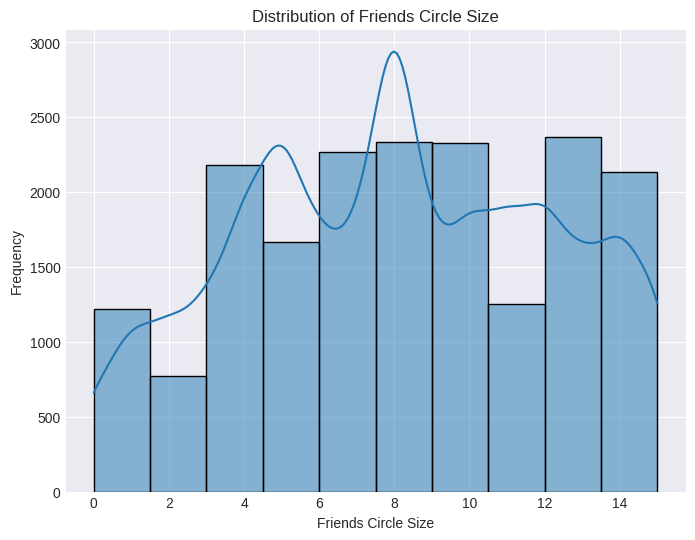

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Friends_circle_size', kde=True, bins=10)
plt.title('Distribution of Friends Circle Size')
plt.xlabel('Friends Circle Size')
plt.ylabel('Frequency')
plt.show()

## 3.5 Distribution Of Post Frequency

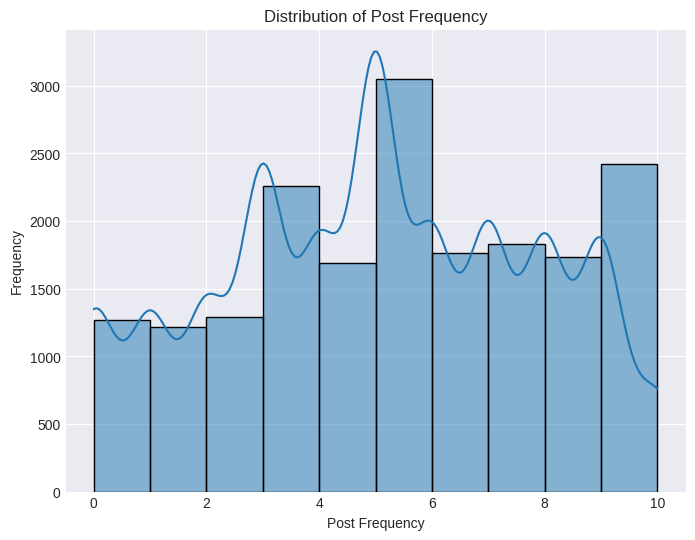

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Post_frequency', kde=True, bins=10)
plt.title('Distribution of Post Frequency')
plt.xlabel('Post Frequency')
plt.ylabel('Frequency')
plt.show()

## 3.6 Stage Fear

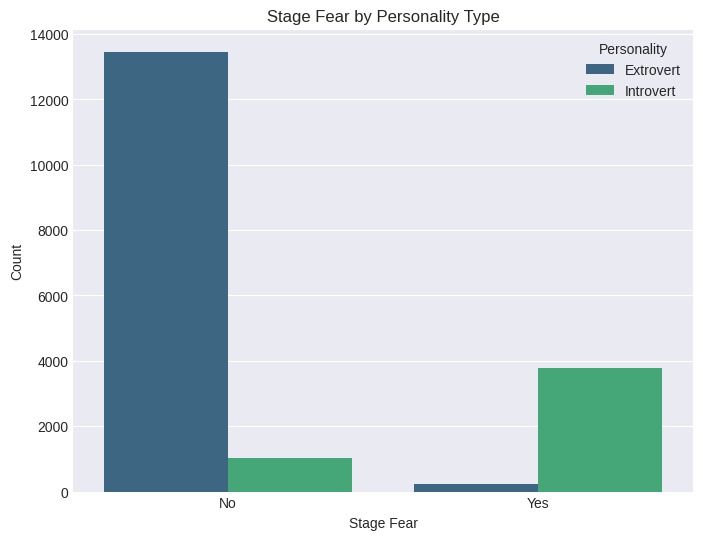

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Stage_fear', hue='Personality', palette='viridis')
plt.title('Stage Fear by Personality Type')
plt.xlabel('Stage Fear')
plt.ylabel('Count')
plt.legend(title='Personality')
plt.show()

## 3.7 Drained After Socializing by Personality


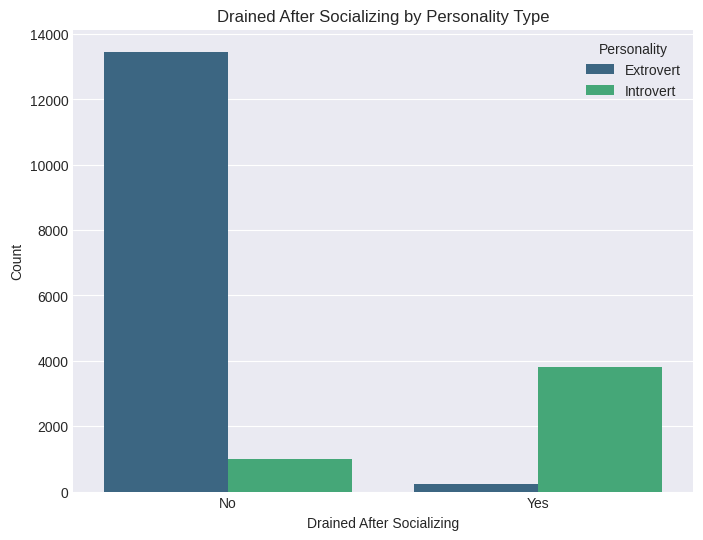

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', palette='viridis')
plt.title('Drained After Socializing by Personality Type')
plt.xlabel('Drained After Socializing')
plt.ylabel('Count')
plt.legend(title='Personality')
plt.show()

## 3.8 Time Spent Alone vs. Personality


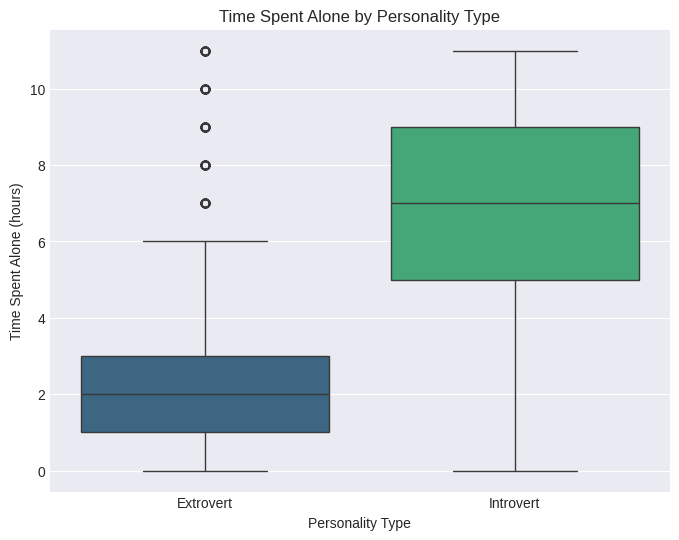

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Personality', y='Time_spent_Alone', palette='viridis')
plt.title('Time Spent Alone by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Time Spent Alone (hours)')
plt.show()

## 3.9 Social Event Attendance vs. Personality


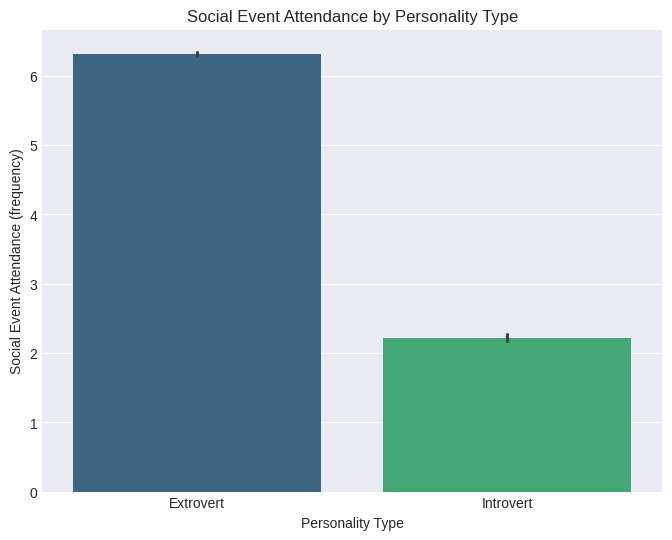

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Personality', y='Social_event_attendance', palette='viridis')
plt.title('Social Event Attendance by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Social Event Attendance (frequency)')
plt.show()

## 3.10 Friends Circle Size vs. Personality


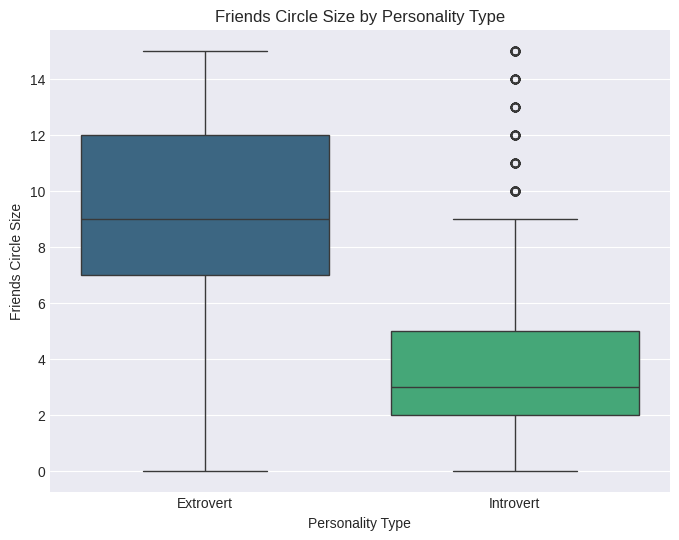

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Personality', y='Friends_circle_size', palette='viridis')
plt.title('Friends Circle Size by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Friends Circle Size')
plt.show()

## 3.11 Post frequency By Personality Type

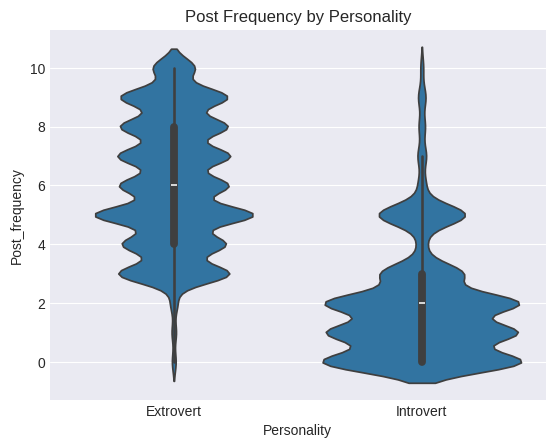

In [ ]:
sns.violinplot(x='Personality', y='Post_frequency', data=df)
plt.title("Post Frequency by Personality")
plt.show()

# 4.Feature Engineering

In [ ]:
df['Stage_fear_encoded'] = df['Stage_fear'].map({'No': 0, 'Yes': 1})
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0


In [ ]:
df['Drained_after_socializing_encoded'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0


In [ ]:
df['Social_Activity_Level'] = df['Social_event_attendance'] + df['Going_outside'] + df['Friends_circle_size']
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Social_Activity_Level
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,25.0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,20.0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0,4.0
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,21.0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0,21.0


In [ ]:
df['Social_Discomfort_Index'] = df['Stage_fear_encoded'] + df['Drained_after_socializing_encoded']
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Social_Activity_Level,Social_Discomfort_Index
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,25.0,0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,20.0,0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0,4.0,1
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,21.0,0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0,21.0,0


In [ ]:
df['Social_Balance'] = df['Social_Activity_Level'] / (df['Time_spent_Alone'] + 1)
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Social_Activity_Level,Social_Discomfort_Index,Social_Balance
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,25.0,0,25.000000
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,20.0,0,10.000000
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0,4.0,1,0.571429
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,21.0,0,5.250000
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0,21.0,0,10.500000


In [ ]:
df['Discomfort_Efficiency'] = df['Social_Discomfort_Index'] / (df['Social_Activity_Level'] + 1)
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Social_Activity_Level,Social_Discomfort_Index,Social_Balance,Discomfort_Efficiency
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,25.0,0,25.000000,0.0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,20.0,0,10.000000,0.0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0,4.0,1,0.571429,0.2
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,21.0,0,5.250000,0.0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0,21.0,0,10.500000,0.0


In [ ]:
df['Posting_Impact'] = df['Post_frequency'] * df['Social_Activity_Level']
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Social_Activity_Level,Social_Discomfort_Index,Social_Balance,Discomfort_Efficiency,Posting_Impact
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,25.0,0,25.000000,0.0,125.0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,20.0,0,10.000000,0.0,160.0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert,1,0,4.0,1,0.571429,0.2,0.0
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,21.0,0,5.250000,0.0,105.0
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,0,0,21.0,0,10.500000,0.0,105.0


In [ ]:
df['Personality_encoded'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})
df[['Personality', 'Personality_encoded']].head()

,Personality,Personality_encoded
0,Extrovert,1
1,Extrovert,1
2,Introvert,0
3,Extrovert,1
4,Extrovert,1


In [ ]:
X = df.drop(columns=['id', 'Personality', 'Personality_encoded', 'Stage_fear', 'Drained_after_socializing', 'Stage_fear_encoded', 'Drained_after_socializing_encoded'])
y = df['Personality_encoded']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
X.head()

Features (X) shape: (18524, 10)
Target (y) shape: (18524,)


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Social_Activity_Level,Social_Discomfort_Index,Social_Balance,Discomfort_Efficiency,Posting_Impact
0,0.0,6.0,4.0,15.0,5.0,25.0,0,25.000000,0.0,125.0
1,1.0,7.0,3.0,10.0,8.0,20.0,0,10.000000,0.0,160.0
2,6.0,1.0,0.0,3.0,0.0,4.0,1,0.571429,0.2,0.0
3,3.0,7.0,3.0,11.0,5.0,21.0,0,5.250000,0.0,105.0
4,1.0,4.0,4.0,13.0,5.0,21.0,0,10.500000,0.0,105.0


## Data Splitting and Scaling

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14819, 10)
X_test shape: (3705, 10)
y_train shape: (14819,)
y_test shape: (3705,)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("X_train_scaled shape:", X_train_scaled_df.shape)
print("X_test_scaled shape:", X_test_scaled_df.shape)
display(X_train_scaled_df.head())

X_train_scaled shape: (14819, 10)
X_test_scaled shape: (3705, 10)


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Social_Activity_Level,Social_Discomfort_Index,Social_Balance,Discomfort_Efficiency,Posting_Impact
0,-0.712432,0.663248,-0.017884,0.484410,0.011504,0.509481,-0.562483,0.380015,-0.44552,0.100476
1,-0.370111,-0.460157,0.991731,-0.489405,1.092716,-0.174297,-0.562483,-0.371148,-0.44552,0.436127
2,0.314532,-0.085689,0.486923,-0.245951,0.371908,-0.037541,-0.562483,-0.652228,-0.44552,0.056695
3,-0.027789,0.288779,-0.017884,-0.002497,1.092716,0.099214,-0.562483,-0.492303,-0.44552,0.669623
4,-0.370111,0.663248,1.496538,1.701679,-0.348900,1.603526,-0.562483,0.258859,-0.44552,0.261004


# 5. Model Training and Evaluation


## 5.1 Logistic Regression

In [ ]:

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Model Performance:
Accuracy: 0.9686909581646423

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[ 886   66]
 [  50 2703]]


## 5.2 CatBoost Model



In [ ]:

catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_model.fit(X_train_scaled, y_train)

y_pred_catboost = catboost_model.predict(X_test_scaled)

print("CatBoost Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

CatBoost Classifier Model Performance:
Accuracy: 0.9689608636977058

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[ 887   65]
 [  50 2703]]


## 5.3 Train LightGBM Model


In [ ]:

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("LightGBM Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 10946, number of negative: 3873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.738646 -> initscore=1.038945
[LightGBM] [Info] Start training from score 1.038945
LightGBM Classifier Model Performance:
Accuracy: 0.968421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[ 885 

## 5.4 Train XGBoost Model


In [ ]:

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier Model Performance:
Accuracy: 0.9681511470985156

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[ 887   65]
 [  53 2700]]


## 5.5 Random Forest Model


In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Model Performance:
Accuracy: 0.9641025641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       952
           1       0.97      0.98      0.98      2753

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705


Confusion Matrix:
 [[ 880   72]
 [  61 2692]]


## 5.6 Model Comparison


In [ ]:

models = {
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgbm,
    'CatBoost': y_pred_catboost
}

metrics = []

for name, y_prediction in models.items():
    accuracy = accuracy_score(y_test, y_prediction)
    report = classification_report(y_test, y_prediction, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.set_index('Model')

print("Comparison of Model Performance:")
display(metrics_df.sort_values(by='Accuracy', ascending=False))

Comparison of Model Performance:


,Accuracy,Precision,Recall,F1-Score
Model,,,,
CatBoost,0.968961,0.968840,0.968961,0.968880
Logistic Regression,0.968691,0.968563,0.968691,0.968604
LightGBM,0.968421,0.968287,0.968421,0.968327
XGBoost,0.968151,0.968045,0.968151,0.968085
Random Forest,0.964103,0.963987,0.964103,0.964034


## 5.7 Saving Trained Models


In [ ]:
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

models_to_save = {
    'logistic_regression_model': log_reg_model,
    'random_forest_model': rf_model,
    'xgboost_model': xgb_model,
    'lightgbm_model': lgbm_model,
    'catboost_model': catboost_model
}

for name, model in models_to_save.items():
    filename = os.path.join(models_dir, f'{name}.joblib')
    joblib.dump(model, filename)
    print(f'Model \'{name}\' saved to {filename}')

print(f'All models saved to the \'{models_dir}\' directory.')

Model 'logistic_regression_model' saved to trained_models/logistic_regression_model.joblib
Model 'random_forest_model' saved to trained_models/random_forest_model.joblib
Model 'xgboost_model' saved to trained_models/xgboost_model.joblib
Model 'lightgbm_model' saved to trained_models/lightgbm_model.joblib
Model 'catboost_model' saved to trained_models/catboost_model.joblib
All models saved to the 'trained_models' directory.


## 5.8  Top 5 Features

Top 5 Features:


,Feature,Importance
7,Social_Balance,16.157045
6,Social_Discomfort_Index,15.231757
9,Posting_Impact,13.147701
2,Going_outside,10.820735
8,Discomfort_Efficiency,9.960604


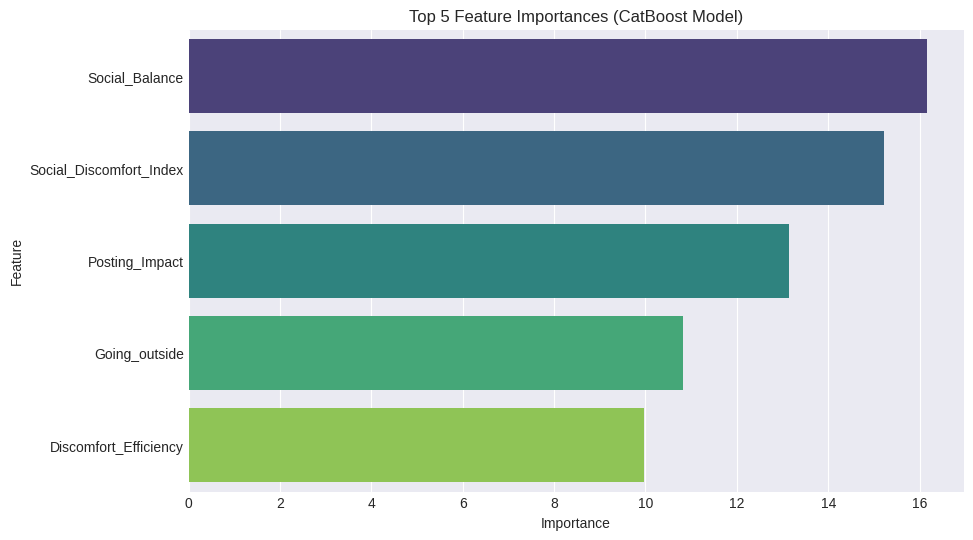

In [ ]:

feature_importances = catboost_model.get_feature_importance()
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Features:")
display(importance_df.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(), palette='viridis')
plt.title('Top 5 Feature Importances (CatBoost Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()